In [1]:
import sys  
sys.path.append("../")

In [2]:
import modules as nn
from initializers import Xavier
from losses import LossMSE as MSE
from activations import *
from utils import *

In [3]:
import torch
torch.set_grad_enabled(False)

In [4]:
import matplotlib.pyplot as plt

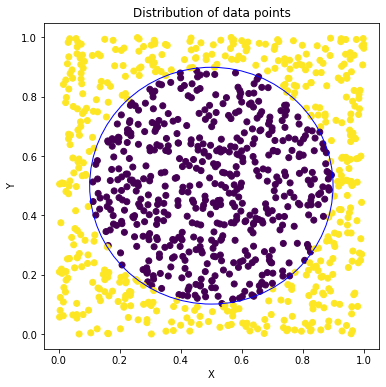

In [53]:
data, labels = get_data(1000)
#Plot the distribution of the generated data, to see how it looks like
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
plt.scatter(data[:,0].tolist(), data[:,1].tolist(), c = labels.tolist())
ax.add_patch(plt.Circle((0.5, 0.5), 1 / (math.sqrt(2*math.pi)), color='b', fill=False))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Distribution of data points")
plt.savefig('disk_data.png')
plt.show()

In [6]:
INPUT_UNITS = 2
HIDDEN_LAYERS = 3
HIDDEN_UNITS = 25
OUTPUT_UNITS = 2

In [7]:
# Generate the data
X_train, y_train = get_data(1000)
X_test, y_test = get_data(1000)

### Training the model and testing it at each epoch:

In [8]:
# Train the model
lrs = [0.01, 0.015, 0.04]
stats = [] 
for lr in lrs:
    print(f"Traininng model with lr={lr}:")
    # The model
    model = nn.Sequential(nn.Linear(INPUT_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, OUTPUT_UNITS),
                          Sigmoid()
                         )
                            
    _, train_loss, train_acc, test_loss, test_acc = train_test_model(model,X_train,y_train,X_test,y_test,lr=lr)
    stats.append([train_loss, train_acc, test_loss, test_acc])
    print("-"*120)

Traininng model with lr=0.01:
Epoch 1: train loss=0.2661, train acccuracy=50.90% | test loss=0.2551, test acccuracy=50.80%
Epoch 5: train loss=0.2469, train acccuracy=50.90% | test loss=0.2465, test acccuracy=50.80%
Epoch 10: train loss=0.2139, train acccuracy=50.90% | test loss=0.2054, test acccuracy=50.80%
Epoch 15: train loss=0.0958, train acccuracy=50.90% | test loss=0.0916, test acccuracy=50.80%
Epoch 20: train loss=0.0561, train acccuracy=68.40% | test loss=0.0592, test acccuracy=70.20%
Epoch 25: train loss=0.0469, train acccuracy=74.10% | test loss=0.0496, test acccuracy=77.40%
Epoch 30: train loss=0.0432, train acccuracy=77.90% | test loss=0.0476, test acccuracy=81.40%
Epoch 35: train loss=0.0403, train acccuracy=80.50% | test loss=0.0379, test acccuracy=83.40%
Epoch 40: train loss=0.0396, train acccuracy=82.10% | test loss=0.0341, test acccuracy=84.80%
Epoch 45: train loss=0.0372, train acccuracy=83.00% | test loss=0.0287, test acccuracy=84.60%
Epoch 50: train loss=0.0360, tra

### Validation at each epoch (split train data into 70% training and 30% validating):

In [9]:
X_train, y_train, X_val, y_val = split_data(X_train,y_train)

In [11]:
val_stats = [] 
for lr in lrs:
    print(f"Traininng model with lr={lr}:")
    # The model (initalize weights)
    model = nn.Sequential(nn.Linear(INPUT_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, OUTPUT_UNITS),
                          Sigmoid()
                         )
                            
    _, train_loss, train_acc, val_loss, val_acc = train_model(model,X_train,y_train,X_val,y_val,lr=lr)
    val_stats.append([train_loss, train_acc, val_loss, val_acc])
    print("-"*120)

Traininng model with lr=0.01:
Epoch 1: train loss=0.3003, train acccuracy=51.29% | validation loss=0.1045, validation acccuracy=52.33%
Epoch 5: train loss=0.2323, train acccuracy=50.29% | validation loss=0.0960, validation acccuracy=52.33%
Epoch 10: train loss=0.1800, train acccuracy=50.29% | validation loss=0.0714, validation acccuracy=52.33%
Epoch 15: train loss=0.1089, train acccuracy=50.29% | validation loss=0.0345, validation acccuracy=52.33%
Epoch 20: train loss=0.0732, train acccuracy=53.00% | validation loss=0.0230, validation acccuracy=54.67%
Epoch 25: train loss=0.0618, train acccuracy=61.86% | validation loss=0.0188, validation acccuracy=65.33%
Epoch 30: train loss=0.0563, train acccuracy=66.43% | validation loss=0.0151, validation acccuracy=70.67%
Epoch 35: train loss=0.0538, train acccuracy=68.57% | validation loss=0.0136, validation acccuracy=74.33%
Epoch 40: train loss=0.0527, train acccuracy=69.29% | validation loss=0.0116, validation acccuracy=75.00%
Epoch 45: train lo

We can see that the best learning rate is `lr=0.01`, let's train a model given that learning rate and test it.

In [12]:
lr=0.01
model = nn.Sequential(nn.Linear(INPUT_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, OUTPUT_UNITS),
                          Sigmoid()
                         )
print(f"Training with lr={lr}")
trained_model, train_loss, train_acc, val_loss, val_acc = train_model(model,X_train,y_train,X_val,y_val,
                                                                      lr=lr,verbose=False)

Training with lr=0.01


In [13]:
test_loss, test_acc = test_model(trained_model, X_test, y_test)

Test loss=0.0293, test accuracy=80.70


----

## Torch:

In [16]:
X_train, y_train = get_data(1000)
X_test, y_test = get_data(1000)

In [17]:
torch.set_grad_enabled(True)

In [18]:
# Train the model
torch_stats = []
for lr in lrs:
    print(f"Traininng PyTorch model with lr={lr}:")
    # The model
    torch_model = torch.nn.Sequential(torch.nn.Linear(INPUT_UNITS, HIDDEN_UNITS),
                            torch.nn.LeakyReLU(),
                            torch.nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                            torch.nn.LeakyReLU(),
                            torch.nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                            torch.nn.LeakyReLU(),
                            torch.nn.Linear(HIDDEN_UNITS, OUTPUT_UNITS),
                            torch.nn.Sigmoid()
                            )
    _, train_loss, train_acc, test_loss, test_acc = torch_train_test_model(torch_model, X_train, y_train, X_test, y_test)
    torch_stats.append([train_loss, train_acc, test_loss, test_acc])
    print("-"*120)

Traininng PyTorch model with lr=0.01:
Epoch 1: train loss=0.1803, train acccuracy=50.60% | test loss=0.1438, test acccuracy=46.60%
Epoch 5: train loss=0.1258, train acccuracy=50.60% | test loss=0.1255, test acccuracy=46.60%
Epoch 10: train loss=0.1250, train acccuracy=50.60% | test loss=0.1248, test acccuracy=46.60%
Epoch 15: train loss=0.1245, train acccuracy=50.60% | test loss=0.1243, test acccuracy=46.60%
Epoch 20: train loss=0.1237, train acccuracy=50.60% | test loss=0.1236, test acccuracy=46.60%
Epoch 25: train loss=0.1223, train acccuracy=50.60% | test loss=0.1223, test acccuracy=46.60%
Epoch 30: train loss=0.1187, train acccuracy=50.60% | test loss=0.1188, test acccuracy=46.60%
Epoch 35: train loss=0.1089, train acccuracy=50.60% | test loss=0.1085, test acccuracy=46.60%
Epoch 40: train loss=0.0868, train acccuracy=50.60% | test loss=0.0846, test acccuracy=46.60%
Epoch 45: train loss=0.0544, train acccuracy=50.60% | test loss=0.0516, test acccuracy=46.60%
Epoch 50: train loss=0.0

## Visualization:

### Epoch train + test:

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
stats_np = np.array(stats)
stats_np.shape

(3, 4, 150)

In [21]:
torch_stats_np = np.array(torch_stats)
torch_stats_np.shape #(lr, [train_loss, train_acc, test_loss, test_acc], epochs)

(3, 4, 150)

In [22]:
def plots_results(results,torch_results,lrs):
    
    lrs_colors = ['b', 'g', 'm']
    
    fig, ((ax1, ax2), (ax3, ax4))  = plt.subplots(2, 2,figsize= (20,18))
    
    ax1.sharey(ax2)
    ax3.sharey(ax4)
    
    for ind,lr in enumerate(lrs):
        
        ax1.plot(results[ind][0], color = lrs_colors[ind], label = f'training loss with lr={lrs[ind]}')
        ax3.plot(results[ind][1], color = lrs_colors[ind], label = f'training accuracy  with lr={lrs[ind]}')
        
        ax2.plot(torch_results[ind][0], color = lrs_colors[ind], label = f'training loss with lr={lrs[ind]}')
        ax4.plot(torch_results[ind][1], color = lrs_colors[ind], label = f'training accuracy  with lr={lrs[ind]}')
        
        
    ax1.set_title('Training Mean Square Error ',{'fontsize':18})
    ax1.set_xlabel("Epochs",{'fontsize':18})
    ax1.set_ylabel("MSE",{'fontsize':18})
    
    ax2.set_title('(PyTorch) Training Mean Square Error ',{'fontsize':18})
    ax2.set_xlabel("Epochs",{'fontsize':18})
    ax2.set_ylabel("MSE",{'fontsize':18})

    ax3.set_title('Training accuracy ',{'fontsize':18})
    ax3.set_xlabel("Epochs",{'fontsize':18})
    ax3.set_ylabel("Accuracy",{'fontsize':18})

    ax4.set_title('(PyTorch) Training accuracy ',{'fontsize':18})
    ax4.set_xlabel("Epochs",{'fontsize':18})
    ax4.set_ylabel("Accuracy",{'fontsize':18})
    
    ax1.legend(loc = 'upper right',fontsize= 'large')
    ax2.legend(loc = 'upper right',fontsize= 'large')
    ax3.legend(loc = 'upper left',fontsize= 'large')
    ax4.legend(loc = 'upper left',fontsize= 'large')
    plt.tight_layout()
    plt.savefig("results.png")
    plt.show()

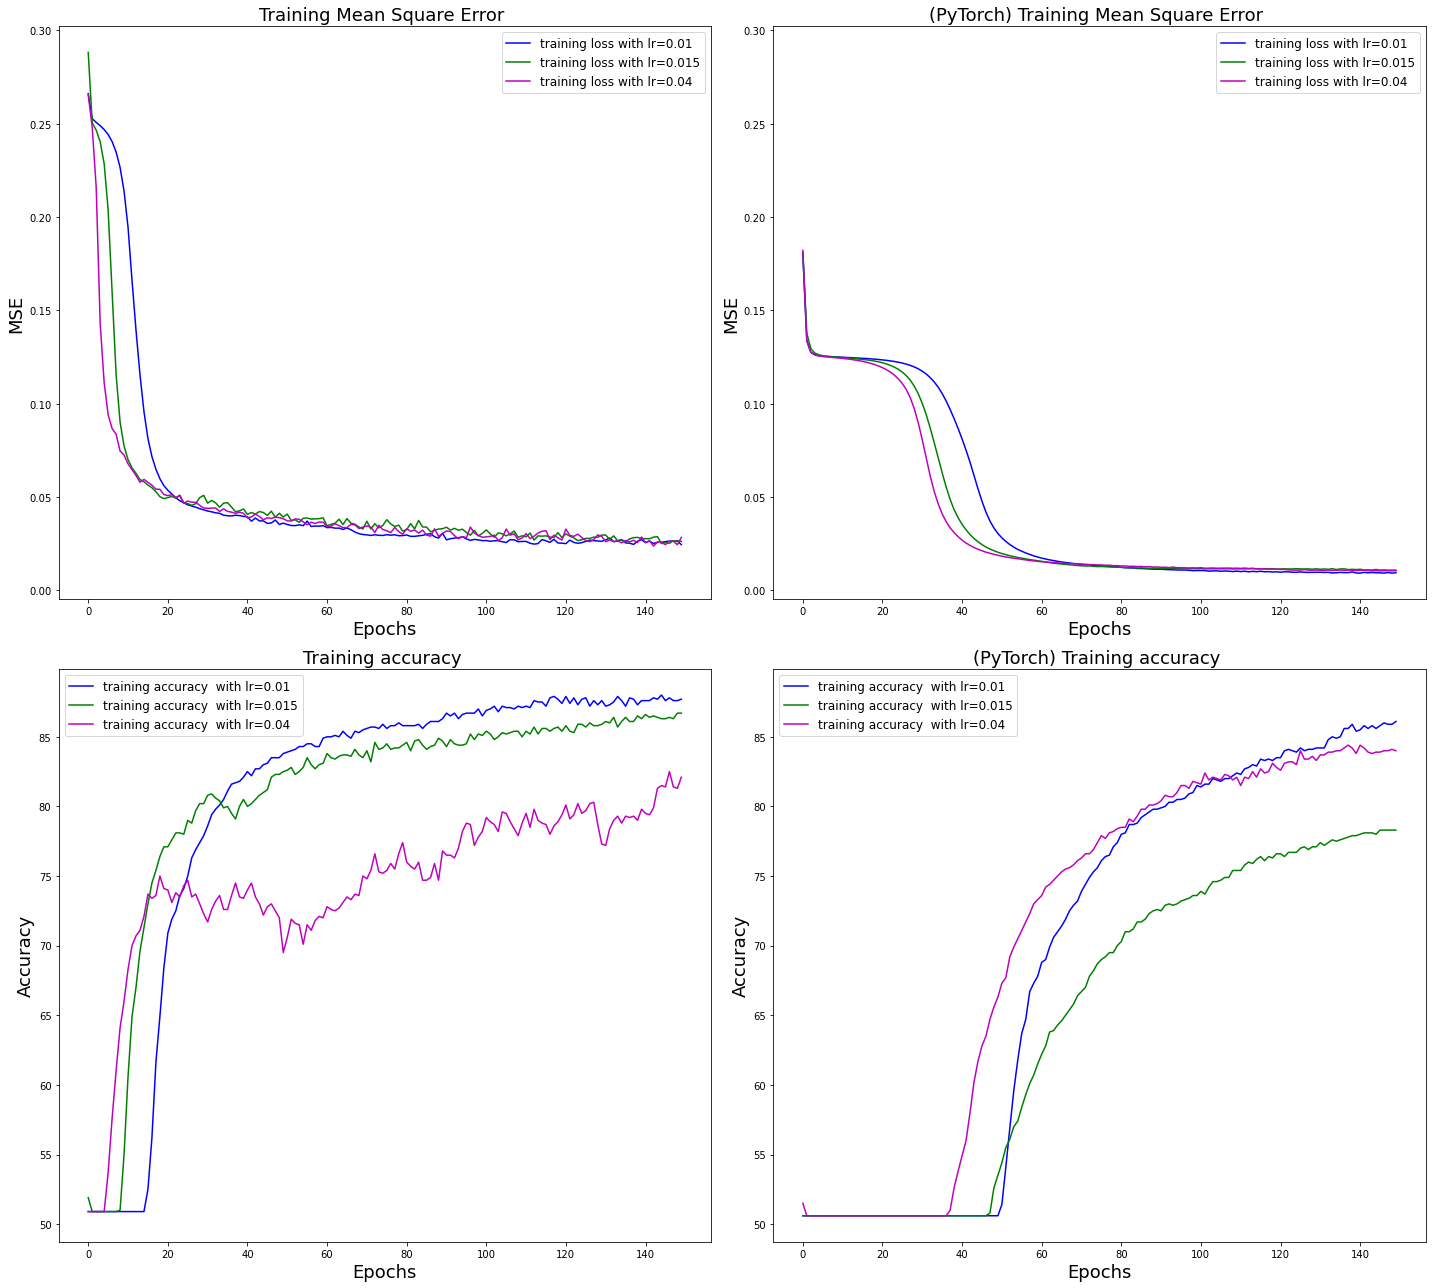

In [23]:
plots_results(stats_np, torch_stats_np,lrs)

### Training withh validation and then testing:

In [33]:
np.array(val_stats).shape

(3, 4, 150)

In [54]:
def val_plots_results(val_stats,lrs):
    # val_stats = [train_loss, train_acc, val_loss, val_acc]
    lrs_colors = ['b', 'g', 'm']
    
    fig, (ax1, ax2)  = plt.subplots(1, 2, figsize= (14,8))
    
    for ind,lr in enumerate(lrs):
        
        ax1.plot(val_stats[ind][0], color = lrs_colors[ind], linestyle="dashed", label = f'training loss with lr={lrs[ind]}')
        ax1.plot(val_stats[ind][2], color = lrs_colors[ind], label = f'validation loss with lr={lrs[ind]}')
        
        ax2.plot(val_stats[ind][1], color = lrs_colors[ind], linestyle="dashed", label = f'training accuracy with lr={lrs[ind]}')
        ax2.plot(val_stats[ind][3], color = lrs_colors[ind], label = f'validation accuracy with lr={lrs[ind]}')
        
        
    ax1.set_title('Mean Square Error ',{'fontsize':18})
    ax1.set_xlabel("Epochs",{'fontsize':18})
    ax1.set_ylabel("MSE",{'fontsize':18})
    
    ax2.set_title('Accuracy ',{'fontsize':18})
    ax2.set_xlabel("Epochs",{'fontsize':18})
    ax2.set_ylabel("Accuracy",{'fontsize':18})
    
    ax1.legend(loc = 'upper right')
    ax2.legend(loc = 'upper left')

    plt.tight_layout()
    plt.savefig("val_results.png")
    plt.show()

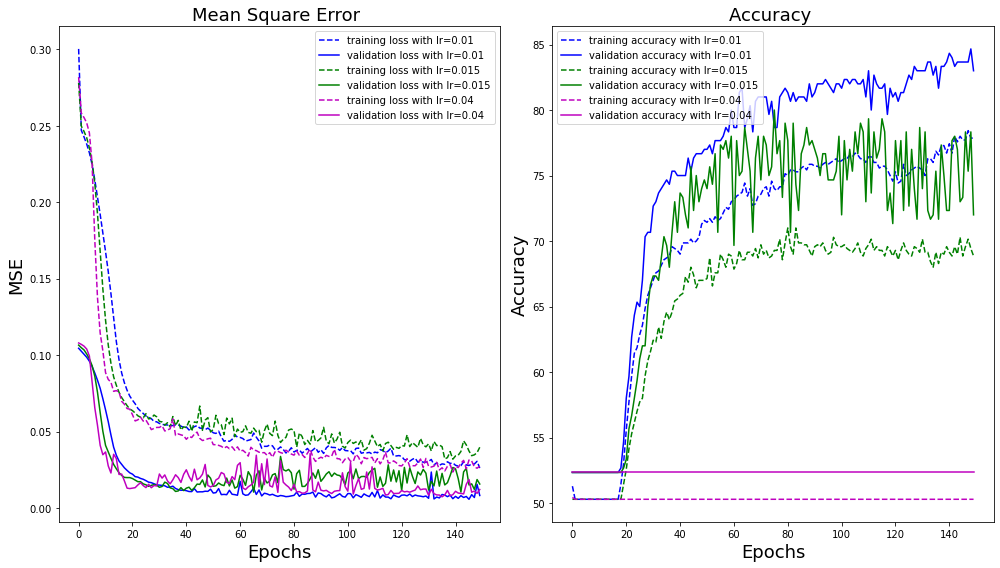

In [55]:
val_plots_results(val_stats,lrs)